In [2]:
# Import necessary libraries
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


## Data Gathring 

In [3]:
# Load WeRateDogs Twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [4]:
import requests

# URL of the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Send a GET request to the URL and save the content to a file
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Load the image predictions dataset
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

# Display the first few rows of the dataframe
df_image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## **Assest data**

In [5]:
# Visual assesment 
# Display the first few rows of each dataset
df_image_predictions.head()
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
# programmatic assement
# General info
df_archive.info()

# Check for missing values
df_archive.isnull().sum()

# Summary statistics
df_archive.describe()

# Unique values in columns
df_archive['rating_numerator'].unique()
df_archive['rating_denominator'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [7]:
# General info
df_image_predictions.info()

# Check for missing values
df_image_predictions.isnull().sum()

# Unique values in columns
df_image_predictions['p1'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [8]:
# General information about the dataset
df_archive.info()

# Checking for missing values
df_archive.isnull().sum()

# Summary statistics
df_archive.describe()

# Checking unique values in some key columns
df_archive['rating_numerator'].unique()
df_archive['rating_denominator'].unique()
df_archive['name'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [9]:
# General information about the dataset
df_image_predictions.info()

# Checking for missing values
df_image_predictions.isnull().sum()

# Checking unique values in key columns
df_image_predictions['p1'].unique()
df_image_predictions['p2'].unique()
df_image_predictions['p3'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

## Assessing Data

### Visual Assessment
- `df_archive`: Some columns contain missing or inconsistent data, such as dog names.
- `df_image_predictions`: Predictions have inconsistent formatting.

### Programmatic Assessment

#### Quality Issues
1. Retweets are present in `df_archive`.
2. Missing `expanded_urls` in `df_archive`.
3. Inconsistent data types (e.g., `tweet_id` should be a string).
4. Inaccurate `rating_numerator` and `rating_denominator` values.
5. Null values in `name` column in `df_archive`.
6. Tweets without images in `df_archive`.
7. Inconsistent dog breed names in `df_image_predictions`.
8. Predictions with low confidence in `df_image_predictions`.

#### Tidiness Issues
1. Separate datasets for related information.
2. Multiple columns for dog stages in `df_archive`.


## Cleaning Data

In [10]:
# Make copies of the original data
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()


In [11]:
#Retweets in df_archive: We only want original tweets.
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_archive_clean['retweeted_status_id'].notnull().sum()  # Should be 0


0

In [12]:
#Missing expanded_urls: Some tweets are missing image URLs.
df_archive_clean = df_archive_clean[df_archive_clean['expanded_urls'].notnull()]
df_archive_clean['expanded_urls'].isnull().sum()  # Should be 0


0

In [13]:
#Inconsistent data types: For example, tweet_id should be a string, not an integer.

df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)


In [14]:
#Inaccurate rating_numerator and rating_denominator: Some ratings may not reflect true values.

df_archive_clean['rating_denominator'].value_counts()

# Filter out invalid denominators
df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator'] == 10]

# Standardize numerator
df_archive_clean['rating'] = df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator']
df_archive_clean['rating_denominator'].unique()  # Should be [10]


array([10], dtype=int64)

In [15]:
#Null values in columns like name: Missing or inconsistent dog names.
df_archive_clean['name'] = df_archive_clean['name'].fillna('None')

# Replace invalid names (e.g., 'a', 'the', 'an') with 'None'
invalid_names = df_archive_clean[df_archive_clean['name'].str.islower()]['name'].unique()
df_archive_clean['name'] = df_archive_clean['name'].apply(lambda x: 'None' if x in invalid_names else x)

df_archive_clean['name'].value_counts().head()  # Should show valid names and 'None'


name
None       711
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Name: count, dtype: int64

In [16]:
#Tweets without images in df_archive: Some tweets may not have associated images.

df_clean = pd.merge(df_archive_clean, df_image_predictions_clean, on='tweet_id')
df_clean.head()  # Should show columns from both dataframes


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [17]:
#Inconsistent dog breed names in df_image_predictions: Different formats (uppercase, lowercase) or spelling variations.

df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.lower()
df_image_predictions_clean['p1'].unique()  # Should all be lowercase


array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'gordon_setter',
       'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
       'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama',
       'chesapeake_bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 't

In [18]:
if 'p1_conf' in df_image_predictions_clean.columns and 'p2_conf' in df_image_predictions_clean.columns and 'p3_conf' in df_image_predictions_clean.columns:
    # Create the max_conf column
    df_image_predictions_clean['max_conf'] = df_image_predictions_clean[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)
    print(df_image_predictions_clean[['p1_conf', 'p2_conf', 'p3_conf', 'max_conf']].head())
else:
    print("Confidence columns are missing in df_image_predictions_clean.")
# Merge the datasets on tweet_id
df_clean = pd.merge(df_archive_clean, df_image_predictions_clean, on='tweet_id')

# Check if max_conf is in df_clean
print(df_clean.columns)

# Filter rows where max_conf > 0.5
if 'max_conf' in df_clean.columns:
    df_clean = df_clean[df_clean['max_conf'] > 0.5]
    print(df_clean['max_conf'].min())  # Should be > 0.5
else:
    print("max_conf column is missing in df_clean.")
# Check the minimum value in max_conf to ensure filtering worked


    p1_conf   p2_conf   p3_conf  max_conf
0  0.465074  0.156665  0.061428  0.465074
1  0.506826  0.074192  0.072010  0.506826
2  0.596461  0.138584  0.116197  0.596461
3  0.408143  0.360687  0.222752  0.408143
4  0.560311  0.243682  0.154629  0.560311
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_conf'],
      dtype='object')
0.500373


In [19]:
#Separate datasets for related information: Merge df_archive and df_image_predictions datasets.

df_clean = pd.merge(df_archive_clean, df_image_predictions_clean, on='tweet_id')
df_clean.info()  # Should show columns from both datasets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1976 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   1976 non-null   object 
 4   source                      1976 non-null   object 
 5   text                        1976 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1976 non-null   object 
 10  rating_numerator            1976 non-null   int64  
 11  rating_denominator          1976 non-null   int64  
 12  name                        1976 non-null   object 
 13  doggo                       74 no

In [20]:
#Multiple columns for dog stages in df_archive: Combine doggo, floofer, pupper, and puppo into a single column
df_clean['dog_stage'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df_clean['dog_stage'] = df_clean['dog_stage'].replace('', 'None')
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_clean['dog_stage'].value_counts()  # Should show consolidated dog stages


dog_stage
None             1670
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: count, dtype: int64

## Storing data


In [21]:
# Save the cleaned DataFrame to a CSV file
df_clean.to_csv('twitter_archive_master.csv', index=False)


In [22]:
from sqlalchemy import create_engine

# Create a SQLite database engine
engine = create_engine('sqlite:///twitter_archive.db')

# Save the DataFrame to a SQLite database
df_clean.to_sql('twitter_archive', con=engine, index=False, if_exists='replace')


1976

## **Data Analysis and Visualization**

#### 1.1 Insight 1: Distribution of Dog Stages

#### Data Used: df_clean['dog_stage']
#### Analysis: Determine the distribution of different dog stages in the dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_9552\1586218542.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dog_stage_counts.index, y=dog_stage_counts.values, palette='viridis')


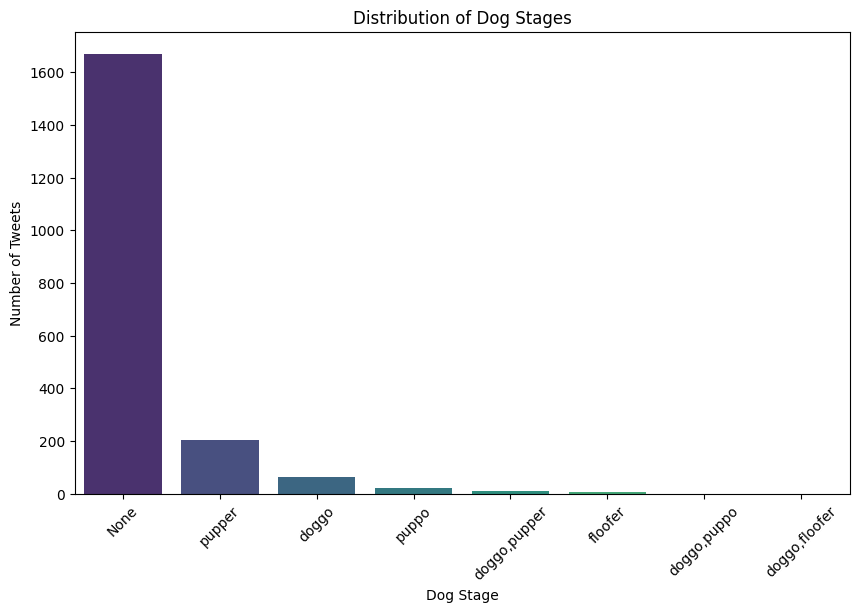

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each dog stage
dog_stage_counts = df_clean['dog_stage'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=dog_stage_counts.index, y=dog_stage_counts.values, palette='viridis')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Dog Stages')
plt.xticks(rotation=45)
plt.show()


#### 1.2 Insights into Rating Scores



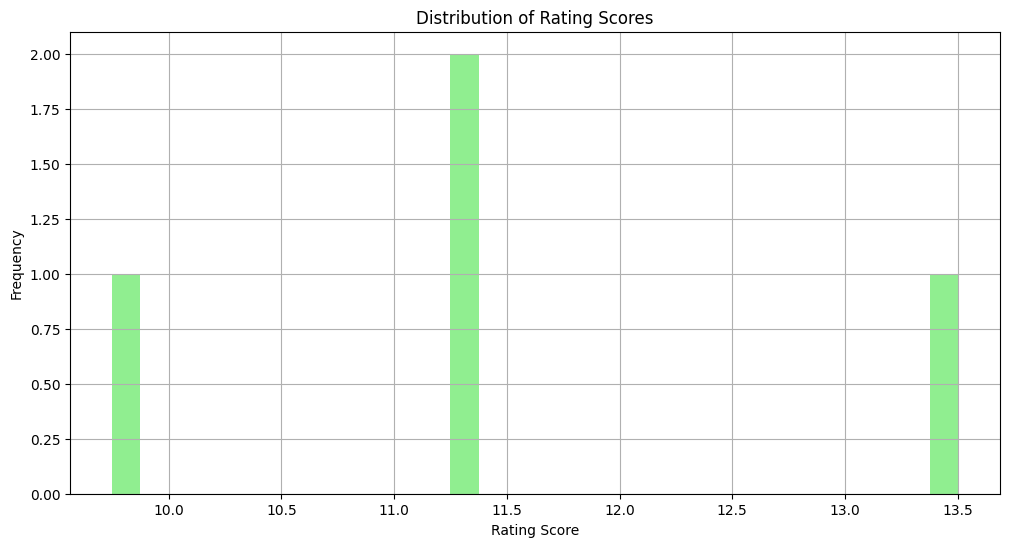

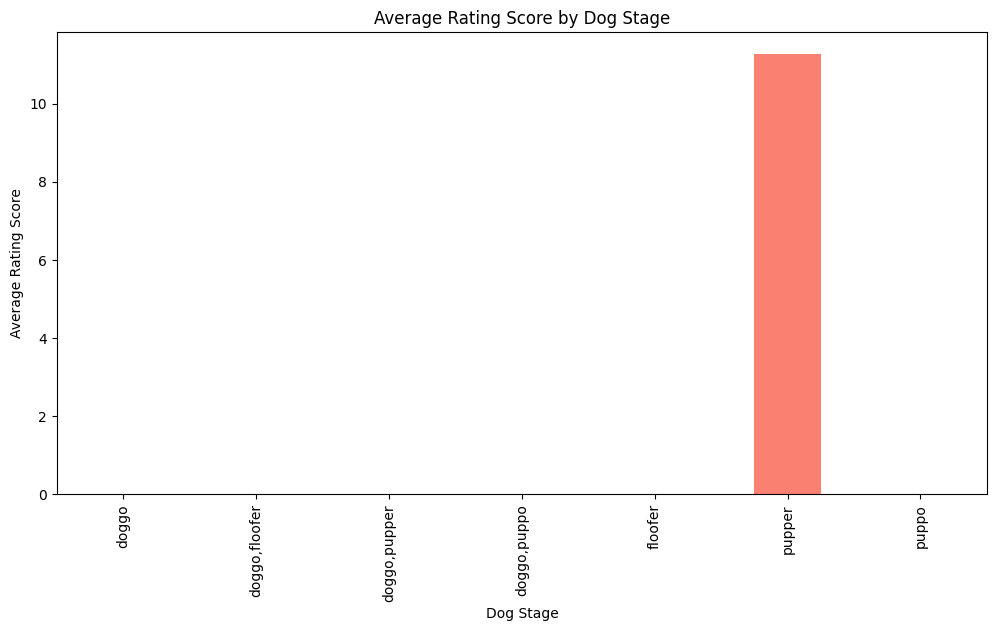

In [26]:
# Extract rating scores from the text
df_clean['rating'] = df_clean['text'].str.extract(r'(\d+\.\d+)/\d+')[0].astype(float)

# 1. Distribution of Rating Scores
plt.figure(figsize=(12, 6))
df_clean['rating'].dropna().hist(bins=30, color='lightgreen')
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

# 2. Average Rating Score by Dog Stage
average_ratings = df_clean.groupby('dog_stage')['rating'].mean()

# Visualization of Average Rating Score by Dog Stage
plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar', color='salmon')
plt.title('Average Rating Score by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating Score')
plt.show()


#### 1.3 Insight 3: Most Common Dog Breeds

#### Data Used: df_clean[['p1', 'p1_conf']] (or ['p1'] if confidence is not needed)
#### Analysis: Identify the most common dog breeds based on image predictions.

C:\Users\HP\AppData\Local\Temp\ipykernel_9552\3472598607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breed_counts.index[:10], y=breed_counts.values[:10], palette='coolwarm')


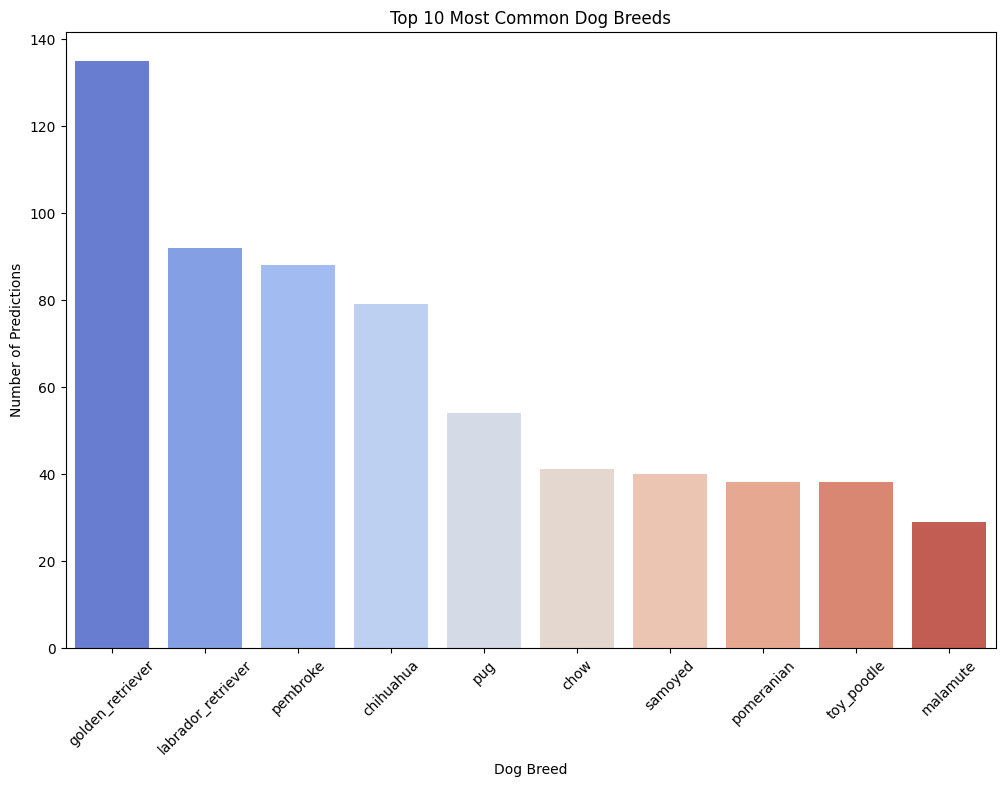

In [24]:
# Count occurrences of each dog breed
breed_counts = df_clean['p1'].value_counts()

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=breed_counts.index[:10], y=breed_counts.values[:10], palette='coolwarm')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Predictions')
plt.title('Top 10 Most Common Dog Breeds')
plt.xticks(rotation=45)
plt.show()
